In [9]:
f_meta = './wavegan.meta'
n = 1000

import tensorflow as tf
import numpy as np

tf.reset_default_graph()

saver = tf.train.import_meta_graph(f_meta)
graph = tf.get_default_graph()

conv_input = graph.get_tensor_by_name('G/Reshape:0')
output = graph.get_tensor_by_name('G/Tanh:0')

x = output[0, :, 0]
X = tf.spectral.rfft(x)
X_mag = tf.abs(X)
X_feat = X_mag

_conv_input = np.zeros((1, 16, 1024))
for i in xrange(1024):
    _conv_input[:, i % 16, i] = 1.

with tf.Session() as sess:
    _outputs = []
    for i in xrange(n):
        sess.run(tf.global_variables_initializer())
        
        _outputs.append(sess.run(X_feat, {conv_input: _conv_input}))

xfeats = np.array(_outputs)

Populating the interactive namespace from numpy and matplotlib


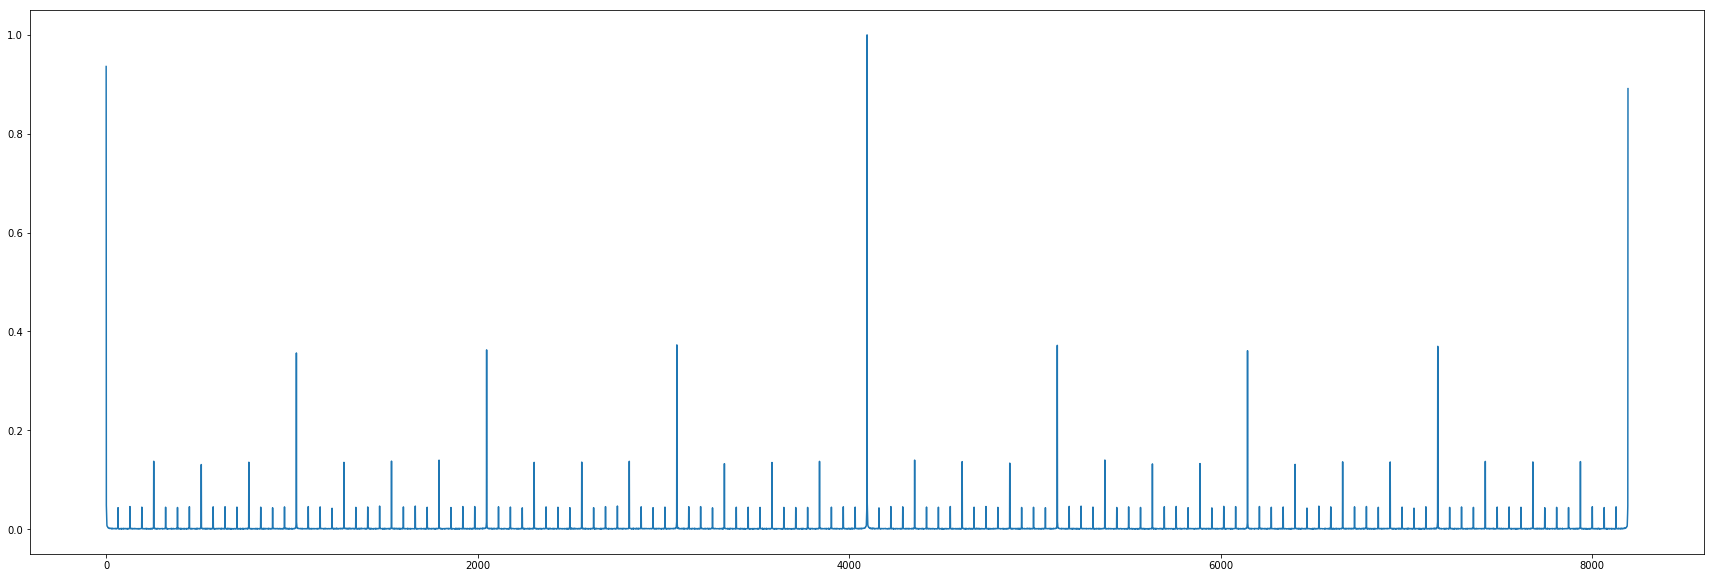

In [12]:
log = False
out_path = 'wavegan_lin_env.pkl'

import cPickle as pickle

m = np.mean(xfeats, axis=0)
if log:
    m = np.log(m + 1e-6)
m -= m.min()
m /= m.max()

with open(out_path, 'wb') as f:
    pickle.dump(m, f)

%pylab inline

plt.figure(figsize=(30, 10))
plt.plot(m)